<a href="https://colab.research.google.com/github/devshah21/Detecting-Covid-19-using-CT-scans/blob/main/detecting_covid_from_CTscans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devshah2021","key":"9ee02bf544ec28e077278fdc69adfb4e"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                     COVID-19 Dataset                                     5MB  2022-11-13 15:47:17          16678        470  1.0              
devrimtuner/list-of-moststreamed-songs-on-spotify             Top 100 Spotify Songs👑🎤🎧🎼                            3KB  2022-12-30 05:42:54            869         43  1.0              
thedevastator/analyzing-credit-card-spending-habits-in-india  Credit Card Spending Habits in India               319KB  2022-12-14 07:30:37           2271         68  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset            Fifa World Cu

In [7]:
!kaggle datasets download -d luisblanche/covidct

 94% 81.0M/85.8M [00:01<00:00, 55.6MB/s]
100% 85.8M/85.8M [00:01<00:00, 52.2MB/s]


In [ ]:
!unzip /content/covidct.zip

In [9]:
!mkdir images

import shutil

shutil.move("/content/CT_COVID", "/content/images/CT_COVID")
shutil.move("/content/CT_NonCOVID", "/content/images/CT_NonCOVID")

'/content/images/CT_NonCOVID'

In [10]:
import os

covidfiles = os.path.join('/content/images/CT_COVID')
noncovidfiles = os.path.join('/content/images/CT_COVID')
print(len(os.listdir(covidfiles)))
print(len(os.listdir(noncovidfiles)))

349
349


In [14]:
import glob


covidimages = glob.glob(os.path.join(covidfiles, '*.png'))
noncovidimages = glob.glob(os.path.join(noncovidfiles, '*png'))
noncovidimages.extend(glob.glob(os.path.join(noncovidfiles,"*.jpg")))

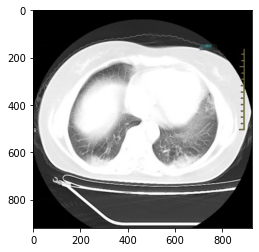

In [15]:
import os
import cv2
import matplotlib.pyplot as plt

covid = cv2.imread(os.path.join(covidimages[0]))
plt.imshow(covid)

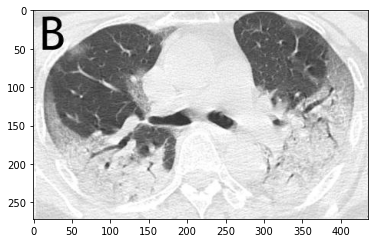

In [16]:
noncovid = cv2.imread(os.path.join(noncovidimages[1]))
plt.imshow(noncovid)

In [17]:
print(covid.shape)
print(noncovid.shape)

(920, 926, 3)
(272, 436, 3)


In [18]:
totaldata = covidimages + noncovidimages

In [19]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import splitfolders
inputfolder = '/content/images'

splitfolders.ratio(inputfolder, output = 'images2', seed = 42, ratio =(0.7, 0.2, 0.1), group_prefix = None)

Copying files: 746 files [00:00, 1800.89 files/s]


In [21]:
#print total number of images in each dataset
covid_train_files = os.listdir('/content/images2/train/CT_COVID')
noncovid_train_files = os.listdir('/content/images2/train/CT_NonCOVID')
covid_test_files = os.listdir('/content/images2/test/CT_COVID')
noncovid_test_files = os.listdir('/content/images2/test/CT_NonCOVID')
covid_val_files = os.listdir('/content/images2/val/CT_COVID')
noncovid_val_files = os.listdir('/content/images2/val/CT_NonCOVID')

print("Total number of train COVID images: {}".format(len(covid_train_files)))
print("Total number of train Non-COVID images: {}".format(len(noncovid_train_files)))
print("Total number of test COVID images: {}".format(len(covid_test_files)))
print("Total number of test Non-COVID images: {}".format(len(noncovid_test_files)))
print("Total number of val COVID images: {}".format(len(covid_val_files)))
print("Total number of val Non-COVID images: {}".format(len(noncovid_val_files)))

Total number of train COVID images: 244
Total number of train Non-COVID images: 277
Total number of test COVID images: 36
Total number of test Non-COVID images: 41
Total number of val COVID images: 69
Total number of val Non-COVID images: 79


<BarContainer object of 6 artists>

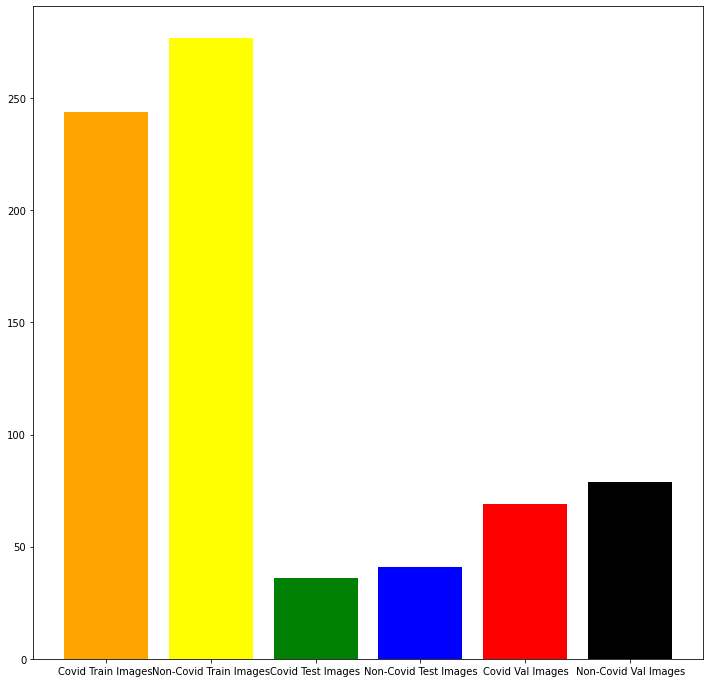

In [22]:
covid_train_files = len(os.listdir('/content/images2/train/CT_COVID'))
noncovid_train_files = len(os.listdir('/content/images2/train/CT_NonCOVID'))
covid_test_files = len(os.listdir('/content/images2/test/CT_COVID'))
noncovid_test_files = len(os.listdir('/content/images2/test/CT_NonCOVID'))
covid_val_files = len(os.listdir('/content/images2/val/CT_COVID'))
noncovid_val_files = len(os.listdir('/content/images2/val/CT_NonCOVID'))

testfiles = covid_test_files + noncovid_test_files

plt.figure(figsize=(12, 12))

plt.bar(["Covid Train Images", "Non-Covid Train Images", "Covid Test Images", "Non-Covid Test Images", 'Covid Val Images', 'Non-Covid Val Images'], [covid_train_files, noncovid_train_files, covid_test_files, noncovid_test_files, covid_val_files, noncovid_val_files], color=['orange', 'yellow', 'green', 'blue', 'red', 'black'])

In [23]:
import numpy as np # linear algebra
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
data = tf.keras.utils.image_dataset_from_directory('/content/images')

Found 746 files belonging to 2 classes.


In [26]:
data_iterator = data.as_numpy_iterator()

In [27]:
batch = data_iterator.next()

In [28]:
data = data.map(lambda x,y: (x/255, y))

In [29]:
data.as_numpy_iterator().next()

(array([[[[0.45003062, 0.43826592, 0.41865808],
          [0.32931986, 0.31755516, 0.29794732],
          [0.3254902 , 0.3137255 , 0.29411766],
          ...,
          [0.6954963 , 0.6994179 , 0.6758885 ],
          [0.69411767, 0.69803923, 0.6745098 ],
          [0.6863358 , 0.6902574 , 0.66672796]],
 
         [[0.38180146, 0.37003675, 0.3504289 ],
          [0.32728535, 0.31552064, 0.2959128 ],
          [0.32540882, 0.3136441 , 0.29403627],
          ...,
          [0.48426586, 0.47985408, 0.45424134],
          [0.50201154, 0.49759975, 0.471987  ],
          [0.50707144, 0.5026597 , 0.47704694]],
 
         [[0.3224504 , 0.3106857 , 0.29107785],
          [0.3254701 , 0.31370538, 0.29409754],
          [0.3245462 , 0.31278148, 0.29317364],
          ...,
          [0.30114985, 0.28766945, 0.26107633],
          [0.318345  , 0.30486462, 0.2782715 ],
          [0.33261144, 0.31913105, 0.29253793]],
 
         ...,
 
         [[0.97559935, 0.9794903 , 0.9558996 ],
          [0.71069

In [30]:
from sklearn.datasets import load_files

# load the data from the 'test' folder
test_data = load_files('/content/images2/test')

# get the labels for the test images
test_labels = test_data.target
img = test_data.data
print(test_labels)

[1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1
 1 1 1]


In [31]:
train = data.take(int(len(os.listdir('/content/images2/train'))))
test = data.take(int(len(os.listdir('/content/images2/test'))))
val = data.take(int(len(os.listdir('/content/images2/val'))))

print(train, test, val)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> <TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> <TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [32]:
batch_size = 128
imgheight = 150
imgwidth = 150

In [33]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(imgheight, imgwidth ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [34]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [36]:
logdirs = 'logs'
callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdirs)


traindir = '/content/images2/train'
testdir = '/content/images2/test'
valdir = '/content/images2/val'
trainimagerescaler = ImageDataGenerator(rescale=1./255)
testimagerescaler = ImageDataGenerator(rescale=1./255)
valimagerescaler = ImageDataGenerator(rescale=1./255)


traindata = trainimagerescaler.flow_from_directory(batch_size= 128, directory= traindir, shuffle=True,target_size=(imgheight, imgwidth),class_mode='binary')
testdata = testimagerescaler.flow_from_directory(batch_size= 128, directory= testdir, shuffle=True,target_size=(imgheight, imgwidth),class_mode='binary')
valdata = valimagerescaler.flow_from_directory(batch_size= 128, directory= valdir, shuffle=True,target_size=(imgheight, imgwidth),class_mode='binary')
                                                                                                              

Found 521 images belonging to 2 classes.
Found 77 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


In [37]:
totaltrainimgs = covid_train_files + noncovid_train_files
totaltestimgs = covid_test_files + noncovid_test_files
totalvalimgs = covid_val_files + noncovid_val_files
print(totaltrainimgs, totaltestimgs, totalvalimgs)

521 77 148


In [39]:
results = model.fit(traindata, epochs=20, validation_data=valdata, callbacks=[callbacks])

Epoch 1/20
5/5 [==============================] - 15s 3s/step - loss: 0.4059 - accuracy: 0.8119 - val_loss: 0.5689 - val_accuracy: 0.7500
Epoch 2/20
5/5 [==============================] - 16s 3s/step - loss: 0.3753 - accuracy: 0.7927 - val_loss: 0.5106 - val_accuracy: 0.7027
Epoch 3/20
5/5 [==============================] - 15s 3s/step - loss: 0.3155 - accuracy: 0.8426 - val_loss: 0.5015 - val_accuracy: 0.7432
Epoch 4/20
5/5 [==============================] - 16s 4s/step - loss: 0.3131 - accuracy: 0.8234 - val_loss: 0.4989 - val_accuracy: 0.7973
Epoch 5/20
5/5 [==============================] - 17s 3s/step - loss: 0.2666 - accuracy: 0.8810 - val_loss: 0.5914 - val_accuracy: 0.7027
Epoch 6/20
5/5 [==============================] - 15s 3s/step - loss: 0.2441 - accuracy: 0.8599 - val_loss: 0.5476 - val_accuracy: 0.7635
Epoch 7/20
5/5 [==============================] - 15s 4s/step - loss: 0.2558 - accuracy: 0.8618 - val_loss: 0.5541 - val_accuracy: 0.7703
Epoch 8/20
5/5 [==================

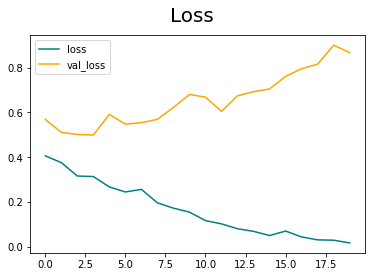

In [40]:
fig = plt.figure()
plt.plot(results.history['loss'], color='teal', label='loss')
plt.plot(results.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

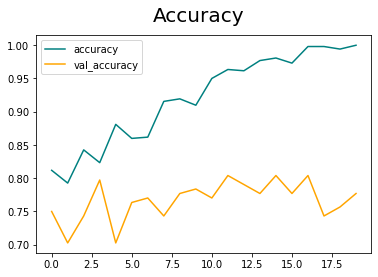

In [41]:
fig = plt.figure()
plt.plot(results.history['accuracy'], color='teal', label='accuracy')
plt.plot(results.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [42]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [44]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [45]:
predictions = probability_model.predict(testdata)

1/1 [==============================] - 1s 960ms/step


In [46]:
predictions[4]


array([0.99999994], dtype=float32)

In [47]:
np.argmax(predictions[4])

0

In [48]:
test_labels[4]

0

In [49]:
test_images = glob.glob(os.path.join('/content/images2/test/CT_COVID', '*.png'))
test_images.extend(glob.glob(os.path.join('/content/images2/test/CT_NonCOVID', '*png')))
test_images.extend(glob.glob(os.path.join('/content/images2/test/CT_NonCOVID',"*.jpg")))

In [53]:
resized_test_images = []
for image in test_images:
  img = cv2.imread(image)
  resized_img = cv2.resize(img, (150,150))
  resized_test_images.append(resized_img)

In [67]:
first_image = resized_test_images[4]
print(first_image.shape)

(150, 150, 3)


In [68]:
imagetest = (np.expand_dims(first_image,0))
print(imagetest.shape)

(1, 150, 150, 3)


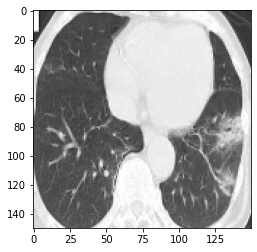

0


In [80]:
plt.imshow(first_image)
plt.show()
print(test_labels[4])

In [76]:
image = tf.convert_to_tensor(first_image, dtype=tf.float32)

In [77]:
image = tf.expand_dims(image, 0)

In [79]:
predictions = model.predict(image)

# Get the predicted label
predicted_label = tf.argmax(predictions, axis=1)
predicted_label = predicted_label.numpy()[0]
print(predicted_label)

1/1 [==============================] - 0s 32ms/step
0


In [93]:
number = random.randint(0, testfiles)
print(number)
second_image = resized_test_images[number]
print(second_image.shape)

42
(150, 150, 3)


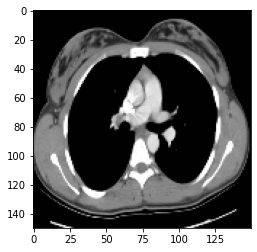

0


In [94]:
plt.imshow(second_image)
plt.show()
print(test_labels[number])

In [95]:
image1 = tf.convert_to_tensor(second_image, dtype=tf.float32)

In [96]:
image1 = tf.expand_dims(image1, 0)

In [97]:
predictions = model.predict(image1)

# Get the predicted label
predicted_label = tf.argmax(predictions, axis=1)
predicted_label = predicted_label.numpy()[0]
print(predicted_label)

1/1 [==============================] - 0s 40ms/step
0


In [177]:
number2 = random.randint(0, testfiles)
print(number2)
third_image = resized_test_images[number2]
print(third_image.shape)

55
(150, 150, 3)
